## Kaitlyn's Analysis (Clean)

---

## Questions: 
- Does the preferred playstyled of a game have an effect on anxiety, satisfaction with life, and social phobia?
- Does amount of hours played per week have an effect on anxiety, satisfaction with life, and social phobia?

In [1]:
# dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress
from scipy.stats import ttest_ind
import numpy as np

# file path
full_data_csv = Path('../data_cleanup/Gaming.csv')

# read file
full_data_df = pd.read_csv(full_data_csv)

# preview dataframe
full_data_df.head()

,Unnamed: 0,Entry,Gender,Age,Residence,Birthplace,Work,Degree,Game,Hours per Week,...,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,SPIN Total
0,0,1,Male,25,USA,USA,Unemployed / between jobs,Bachelor (or equivalent),Skyrim,15,...,0,0,0,0,0,1,0,1,0,5
1,1,2,Male,41,USA,USA,Unemployed / between jobs,Bachelor (or equivalent),Other,8,...,4,0,3,0,1,3,3,1,2,33
2,2,3,Female,32,DEU,DEU,Employed,Bachelor (or equivalent),Other,0,...,0,1,1,3,0,2,4,4,2,31
3,3,4,Male,28,USA,USA,Employed,Bachelor (or equivalent),Other,20,...,0,0,1,3,0,0,1,0,0,11
4,4,5,Male,19,KOR,USA,Employed,High school diploma (or equivalent),Other,20,...,2,0,1,0,0,0,0,3,0,13


---

### Part 1: Preferred Playstyle Influence on Anxiety, Satisfaction with Life, and Social Phobia

##### Null Hypothesis: Preferred playstyle does not have an effect on levels of anxiety, satisfaction with life, or social phobia for an individual who plays games.
##### Alternate Hypothesis: Preferred playstyle has an effect on levels of anxiety, satisfaction with life, or social phobia for an individual who plays games.

In [2]:
# drop columns that are not of interest
playstyle_df = full_data_df.drop(columns = [
    'Unnamed: 0', 'Game', 'Gender', 'Age', 'Residence', 
    'Birthplace', 'Work', 'Degree', 'Gaming Motivation', 
    'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7',
    'SWL1','SWL2', 'SWL3', 'SWL4', 'SWL5',
    'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6', 
    'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10','SPIN11', 'SPIN12', 
    'SPIN13', 'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17'
    ])

# display dataframe
playstyle_df.head()

,Entry,Hours per Week,Playstyle,GAD Total,SWL Total,SPIN Total
0,1,15,Singleplayer,1,23,5
1,2,8,Multiplayer - online - with strangers,8,16,33
2,3,0,Singleplayer,8,17,31
3,4,20,Multiplayer - online - with online acquaintanc...,0,17,11
4,5,20,Multiplayer - online - with strangers,14,14,13


In [3]:
# categorize as only 'singleplayer' or 'multiplayer'
def categorize_playstyle(style: str) -> str:
    style = style.lower()
    if ('multiplayer' in style) and ('singleplayer' in style):
        return None
    elif 'multiplayer' in style:
        return 'multiplayer'
    elif 'singleplayer' in style:
        return "singleplayer"
    else:
        return None

playstyle_df['xPlaystyle'] = playstyle_df.apply(lambda row: categorize_playstyle(row['Playstyle']), axis=1)

# drop rows that did not contain singleplayer or multiplayer
playstyle_df.dropna(subset=['xPlaystyle'], inplace=True)

# display dataframe
playstyle_df.head(20)

,Entry,Hours per Week,Playstyle,GAD Total,SWL Total,SPIN Total,xPlaystyle
0,1,15,Singleplayer,1,23,5,singleplayer
1,2,8,Multiplayer - online - with strangers,8,16,33,multiplayer
2,3,0,Singleplayer,8,17,31,singleplayer
3,4,20,Multiplayer - online - with online acquaintanc...,0,17,11,multiplayer
4,5,20,Multiplayer - online - with strangers,14,14,13,multiplayer
5,6,4,Multiplayer - online - with real life friends,1,17,13,multiplayer
6,7,30,Multiplayer - online - with online acquaintanc...,0,16,26,multiplayer
7,9,2,Multiplayer - online - with strangers,12,12,55,multiplayer
8,10,25,Multiplayer - online - with online acquaintanc...,10,13,26,multiplayer
9,11,14,Singleplayer,19,27,6,singleplayer


In [4]:
# get length of updated dataframe
len(playstyle_df)

11003

In [5]:
# make new dataframe with averages of each score by playstyle
cols = ['xPlaystyle', 'GAD Total', 'SWL Total', 'SPIN Total']
playstyle_mean_df = playstyle_df[cols].groupby(['xPlaystyle']).mean()
playstyle_mean_df = playstyle_mean_df.rename(columns={
    'GAD Total': 'GAD Avg',
    'SWL Total': 'SWL Avg',
    'SPIN Total': 'SPIN Avg'
}).reset_index()

# display dataframe
playstyle_mean_df

,xPlaystyle,GAD Avg,SWL Avg,SPIN Avg
0,multiplayer,5.130204,19.904858,19.441611
1,singleplayer,5.835385,18.583077,22.270769


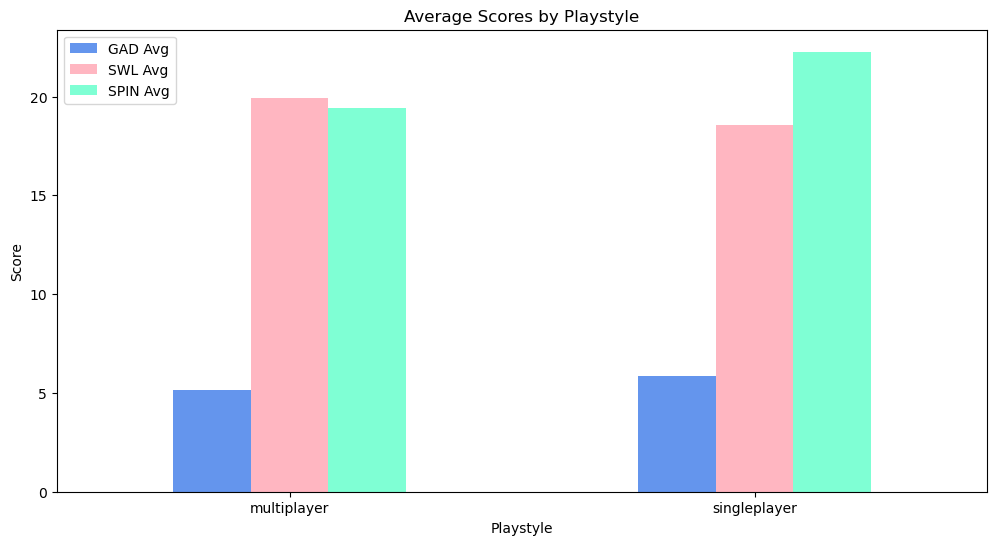

In [6]:
# create bar graph summarizing avg scores by playstyle
cols_playstyle_avg = ['GAD Avg', 'SWL Avg', 'SPIN Avg']
color = ['cornflowerblue', 'lightpink', 'aquamarine']

playstyle_mean_df.plot(
    x = 'xPlaystyle',
    y = ['GAD Avg', 'SWL Avg', 'SPIN Avg'], 
    kind = 'bar', 
    figsize = (12,6), 
    color = color,
    xlabel ='Playstyle', 
    ylabel ='Score', 
    title = 'Average Scores by Playstyle', 
    rot = 0
);

# save figure
plt.savefig('../images/playstyle_bar_all')

# display figure
plt.show()

In [7]:
# find statistical significances for scores between each playstyle group

# statistical significance of gad scores between playstyles
singleplayer_gad = playstyle_df[playstyle_df['xPlaystyle'] == 'singleplayer']
multiplayer_gad = playstyle_df[playstyle_df['xPlaystyle'] == 'multiplayer']
q1_result_gad = ttest_ind(singleplayer_gad['GAD Total'], multiplayer_gad['GAD Total'])

if q1_result_gad.statistic >= 2 or q1_result_gad.statistic <= -2 and q1_result_gad.pvalue < 0.05:
    print(f'Statistical significance of GAD scores between playstyles: \
    \nt-stat: {q1_result_gad.statistic} \
    \np-value: {q1_result_gad.pvalue} \
    \ndegrees of freedom: {q1_result_gad.df} \
    \nThe data is statistically significant. We may reject the null hypothesis.'
)
else:
    print(f'Statistical significance of GAD scores between playstyles: \
    \nt-stat: {q1_result_gad.statistic} \
    \np-value: {q1_result_gad.pvalue} \
    \ndegrees of freedom: {q1_result_gad.df} \
    \nThe data is not statistically significant. We may not reject the null hypothesis.'
) 

print('')

# statistical significance of swl scores between playstyles
singleplayer_swl = playstyle_df[playstyle_df['xPlaystyle'] == 'singleplayer']
multiplayer_swl = playstyle_df[playstyle_df['xPlaystyle'] == 'multiplayer']
q1_result_swl = ttest_ind(singleplayer_swl['SWL Total'], multiplayer_swl['SWL Total'])

if q1_result_swl.statistic >= 2 or q1_result_swl.statistic <= -2 and q1_result_swl.pvalue < 0.05:
    print(
    f'Statistical significance of SWL scores between playstyles: \
    \nt-stat: {q1_result_swl.statistic} \
    \np-value: {q1_result_swl.pvalue} \
    \ndegrees of freedom: {q1_result_swl.df} \
    \nThe data is statistically significant. We may reject the null hypothesis.'
)
else:
    print(
    f'Statistical significance of SWL scores between playstyles: \
    \nt-stat: {q1_result_swl.statistic} \
    \np-value: {q1_result_swl.pvalue} \
    \ndegrees of freedom: {q1_result_swl.df} \
    \nThe data is not statistically significant. We may not reject the null hypothesis.'
) 

print('')

# statistical significance of spin scores between playstyles
singleplayer_spin = playstyle_df[playstyle_df['xPlaystyle'] == 'singleplayer']
multiplayer_spin = playstyle_df[playstyle_df['xPlaystyle'] == 'multiplayer']
q1_result_spin = ttest_ind(singleplayer_spin['SPIN Total'], multiplayer_spin['SPIN Total'])

if q1_result_spin.statistic >= 2 or q1_result_spin.statistic <= -2 and q1_result_spin.pvalue < 0.05:
    print(f'Statistical significance of SPIN scores between playstyles: \
    \nt-stat: {q1_result_spin.statistic} \
    \np-value: {q1_result_spin.pvalue} \
    \ndegrees of freedom: {q1_result_swl.df} \
    \nThe data is statistically significant. We may reject the null hypothesis.'
)
else:
    print(f'Statistical significance of SPIN scores between playstyles: \
    \nt-stat: {q1_result_spin.statistic} \
    \np-value: {q1_result_spin.pvalue} \
    \ndegrees of freedom: {q1_result_spin.df} \
    \nThe data is not statistically significant. We may not reject the null hypothesis.'
)

Statistical significance of GAD scores between playstyles:     
t-stat: 3.722876942234274     
p-value: 0.00019794829345995884     
degrees of freedom: 11001.0     
The data is statistically significant. We may reject the null hypothesis.

Statistical significance of SWL scores between playstyles:     
t-stat: -4.539017878181439     
p-value: 5.71164488290868e-06     
degrees of freedom: 11001.0     
The data is statistically significant. We may reject the null hypothesis.

Statistical significance of SPIN scores between playstyles:     
t-stat: 5.2192145532734475     
p-value: 1.829569817520145e-07     
degrees of freedom: 11001.0     
The data is statistically significant. We may reject the null hypothesis.


---
### Question 1 Analysis:
##### Main observations:
##### Higher avg GAD score in singleplayer group 
- t = 3.72, p = 0.0002
##### Lower avg SWL score in singleplayer group
- t = -4.54, p = 5.71e-6
##### Higher avg SPIN score in singleplayer group
- t = 5.22, p = 1.83e-7
##### Overall, we reject the null hypothesis and accept the alternate hypothesis: Preferred playstyle does have an effect on levels of anxiety, satisfaction with life, or social phobia for an individual who plays games.
- Exploratory commentary: Players who primarily play singleplayer games appear on average to be more negatively impacted by their mental health and are associated with higher levels of anxiety, lower levels of satisfaction with life, and higher levels of social phobia when compared to players who primarily play multiplayer games. A reasonable explanation for these observations could be that players with higher social phobia may gravitate towards singleplayer games in order to avoid social interaction that were to occur when playing multiplayer games. It is also possible for social phobia to serve as contributing factor to levels of anxiety, which may also additionally explain why anxiety levels are higher in players who play singleplayer than players who play multiplayer. In addition, due to increased levels of both anxiety and social phobia, this may also explain a decrease in satisfaction with life, as higher anxiety and social phobia can be seen as a source of discomfort that could possibly contribute to a lower SWL score. 
---

### Part 2: Hours Played Influence on Anxiety, Satisfaction with Life, and Social Phobia

##### Null Hypothesis: Hours played per week does not have an affect on levels of anxiety, satisfaction with life, or social phobia for an individual who plays games.
##### Alternate Hypothesis: Hours played per week has an affect on levels of anxiety, satisfaction with life, or social phobia for an individual who plays games.

In [8]:
# drop columns that are not of interest
hours_df = full_data_df.drop(columns = [
    'Unnamed: 0', 'Game', 'Gender', 'Age', 'Residence', 
    'Birthplace', 'Work', 'Degree', 'Gaming Motivation', 'Playstyle',
    'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7',
    'SWL1','SWL2', 'SWL3', 'SWL4', 'SWL5',
    'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6', 
    'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10','SPIN11', 'SPIN12', 
    'SPIN13', 'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17'
    ])

# display dataframe
hours_df.head()

,Entry,Hours per Week,GAD Total,SWL Total,SPIN Total
0,1,15,1,23,5
1,2,8,8,16,33
2,3,0,8,17,31
3,4,20,0,17,11
4,5,20,14,14,13


In [9]:
# find minimum hours per week played
hours_df['Hours per Week'].min()

0

In [10]:
# drop rows with 0 hours
zero_hours = hours_df[hours_df['Hours per Week'] == 0].index
hours_df.drop(zero_hours, inplace=True)

# display dataframe
hours_df.head()

,Entry,Hours per Week,GAD Total,SWL Total,SPIN Total
0,1,15,1,23,5
1,2,8,8,16,33
3,4,20,0,17,11
4,5,20,14,14,13
5,6,4,1,17,13


In [11]:
# get length of updated dataframe
len(hours_df)

11128

In [12]:
# find new minimum hours per week played
hours_df['Hours per Week'].min()

1

In [13]:
# find maximum hours per week played
hours_df['Hours per Week'].max()

140

In [14]:
# make copy of hours_df
hours_halved_df = hours_df.copy()

# create bins
bins = [1, 70, 140]

# create names for binds
hours_halved = ['70 or Less', 'More than 70']

# slice data and place into bins
hours_halved_df['Hours per Week Range'] = pd.cut(hours_halved_df['Hours per Week'], 
                                          bins, labels=hours_halved, 
                                          include_lowest=True)

# display dataframe
hours_halved_df.head()

,Entry,Hours per Week,GAD Total,SWL Total,SPIN Total,Hours per Week Range
0,1,15,1,23,5,70 or Less
1,2,8,8,16,33,70 or Less
3,4,20,0,17,11,70 or Less
4,5,20,14,14,13,70 or Less
5,6,4,1,17,13,70 or Less


In [15]:
# make new dataframe with averages of each score by hours played per week
cols = ['Hours per Week Range', 'GAD Total', 'SWL Total', 'SPIN Total']
hours_halved_mean_df = hours_halved_df[cols].groupby(['Hours per Week Range'], observed=True).mean()
hours_halved_mean_df = hours_halved_mean_df.rename(columns={
    'GAD Total': 'GAD Avg',
    'SWL Total': 'SWL Avg',
    'SPIN Total': 'SPIN Avg'
}).reset_index()

# display dataframe
hours_halved_mean_df.head()

,Hours per Week Range,GAD Avg,SWL Avg,SPIN Avg
0,70 or Less,5.142172,19.863801,19.538281
1,More than 70,8.038462,15.243590,25.474359


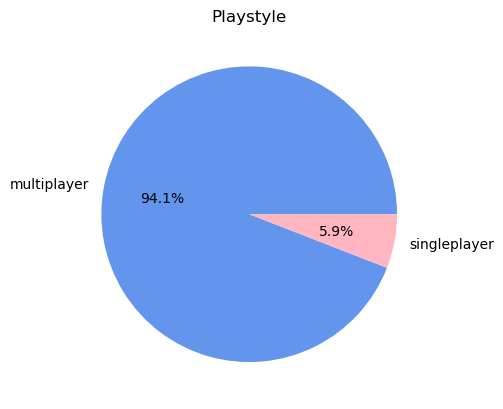

In [16]:
# create pie chart to visualize player distribution

# assign variables
playstyle_counts = playstyle_df['xPlaystyle'].value_counts()
colors = ['cornflowerblue', 'lightpink']
# create pie plot
plt.title('Playstyle')
plt.pie(
        playstyle_counts, 
        labels= playstyle_counts.index, 
        autopct= '%1.1f%%', 
        colors=colors,
        startangle= 0
)

# save figure
plt.savefig('../images/playstyle_pie')

# diplay figure
plt.show()

Statistical significance of GAD scores between hours played:     
t-stat: -5.440184563237311     
p-value: 5.435262531747837e-08     
degrees of freedom: 11126.0     
The data is statistically significant. We may reject the null hypothesis.


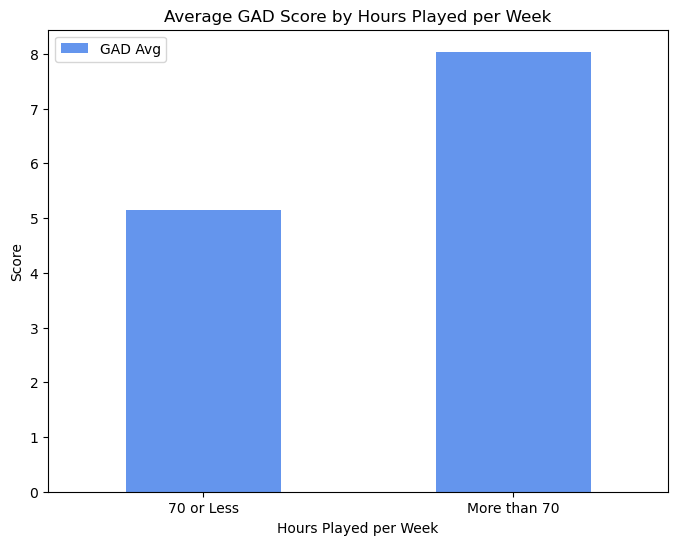

In [ ]:
# create bar graph displaying avg GAD scores by hours played per week
cols_hours_gad_avg = ['GAD Avg']

hours_halved_mean_df.plot(
    x='Hours per Week Range',
    y=['GAD Avg'], 
    kind='bar', 
    figsize=(8,6), 
    color='cornflowerblue',
    xlabel='Hours Played per Week', 
    ylabel='Score', 
    title='Average GAD Score by Hours Played per Week', 
    rot=0
);

# statistical significance of GAD scores between lower and higher hours played
gad_low_hr = hours_halved_df[(hours_halved_df['Hours per Week Range'] == "70 or Less")]
gad_high_hr = hours_halved_df[(hours_halved_df['Hours per Week Range'] == "More than 70")]
q2_result_gad = ttest_ind(gad_low_hr['GAD Total'], gad_high_hr['GAD Total'])

if q2_result_gad.statistic >= 2 or q2_result_gad.statistic <= -2 and q2_result_gad.pvalue < 0.05:
    print(
    f'Statistical significance of GAD scores between hours played: \
    \nt-stat: {q2_result_gad.statistic} \
    \np-value: {q2_result_gad.pvalue} \
    \ndegrees of freedom: {q2_result_gad.df} \
    \nThe data is statistically significant. We may reject the null hypothesis.'
)
else:
    print(
    f'Statistical significance of GAD scores between hours played: \
    \nt-stat: {q2_result_gad.statistic} \
    \np-value: {q2_result_gad.pvalue} \
    \ndegrees of freedom: {q2_result_gad.df} \
    \nThe data is not statistically significant. We may not reject the null hypothesis.'
) 

# save figure
plt.savefig('../images/hours_halved_gad_bar')

# display figure
plt.show()

Statistical significance of SWL scores between hours played:     
t-stat: 5.653977577806831     
p-value: 1.6063865250603278e-08     
degrees of freedom: 11126.0     
The data is statistically significant. We may reject the null hypothesis.


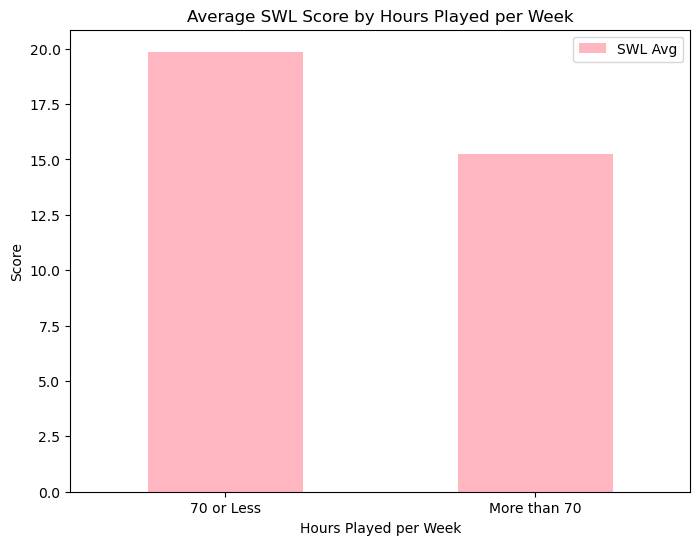

In [22]:
# create bar graph displaying avg SWL scores by hours played per week
cols_hours_swl_avg = ['SWL Avg']

hours_halved_mean_df.plot(
    x = 'Hours per Week Range',
    y = ['SWL Avg'], 
    kind = 'bar', 
    figsize = (8,6), 
    color = 'lightpink',
    xlabel = 'Hours Played per Week', 
    ylabel = 'Score', 
    title = 'Average SWL Score by Hours Played per Week', 
    rot=0
);

# find statistical significance of SWL scores between lower and higher hours played
swl_low_hr = hours_halved_df[(hours_halved_df['Hours per Week Range'] == "70 or Less")]
swl_high_hr = hours_halved_df[(hours_halved_df['Hours per Week Range'] == "More than 70")]
q2_result_swl = ttest_ind(gad_low_hr['SWL Total'], gad_high_hr['SWL Total'])

if q2_result_swl.statistic >= 2 or q2_result_swl.statistic <= -2 and q2_result_swl.pvalue < 0.05:
    print(
    f'Statistical significance of SWL scores between hours played: \
    \nt-stat: {q2_result_swl.statistic} \
    \np-value: {q2_result_swl.pvalue} \
    \ndegrees of freedom: {q2_result_swl.df} \
    \nThe data is statistically significant. We may reject the null hypothesis.'
)
else:
    print(
    f'Statistical significance of SWL scores between hours played: \
    \nt-stat: {q2_result_swl.statistic} \
    \np-value: {q2_result_swl.pvalue} \
    \ndegrees of freedom: {q2_result_swl.df} \
    \nThe data is not statistically significant. We may not reject the null hypothesis.'
) 


# save figure
plt.savefig('../images/hours_halved_swl_bar')

# display figure
plt.show()

Statistical significance of SPIN scores between hours played:     
t-stat: -3.895590838898919     
p-value: 9.853311266971915e-05     
degrees of freedom: 11126.0     
The data is statistically significant. We may reject the null hypothesis.


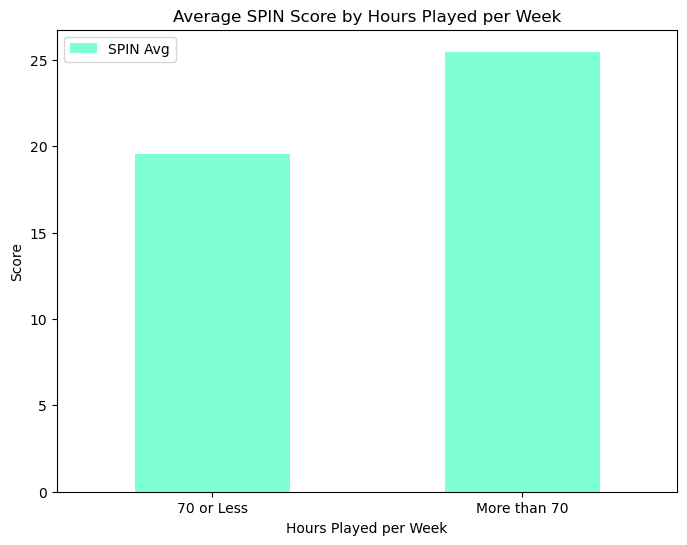

In [24]:
# create bar graph displaying avg SPIN score by hours played per week
cols_hours_spin_avg = ['SPIN Avg']

hours_halved_mean_df.plot(
    x = 'Hours per Week Range',
    y = ['SPIN Avg'], 
    kind = 'bar', 
    figsize = (8,6), 
    color = 'aquamarine',
    xlabel = 'Hours Played per Week', 
    ylabel = 'Score', 
    title = 'Average SPIN Score by Hours Played per Week', 
    rot=0
);

# find statistical significance of SPIN scores between lower and higher hours played
spin_low_hr = hours_halved_df[(hours_halved_df['Hours per Week Range'] == "70 or Less")]
spin_high_hr = hours_halved_df[(hours_halved_df['Hours per Week Range'] == "More than 70")]
q2_result_spin = ttest_ind(gad_low_hr['SPIN Total'], gad_high_hr['SPIN Total'])

if q2_result_spin.statistic >= 2 or q2_result_spin.statistic <= -2 and q2_result_spin.pvalue < 0.05:
    print(
    f'Statistical significance of SPIN scores between hours played: \
    \nt-stat: {q2_result_spin.statistic} \
    \np-value: {q2_result_spin.pvalue} \
    \ndegrees of freedom: {q2_result_spin.df} \
    \nThe data is statistically significant. We may reject the null hypothesis.'
)
else:
    print(
    f'Statistical significance of SPIN scores between hours played: \
    \nt-stat: {q2_result_spin.statistic} \
    \np-value: {q2_result_spin.pvalue} \
    \ndegrees of freedom: {q2_result_spin.df} \
    \nThe data is not statistically significant. We may not reject the null hypothesis.'
) 
    
# save figure
plt.savefig('../images/hours_halved_spin_bar')

# display figure
plt.show()

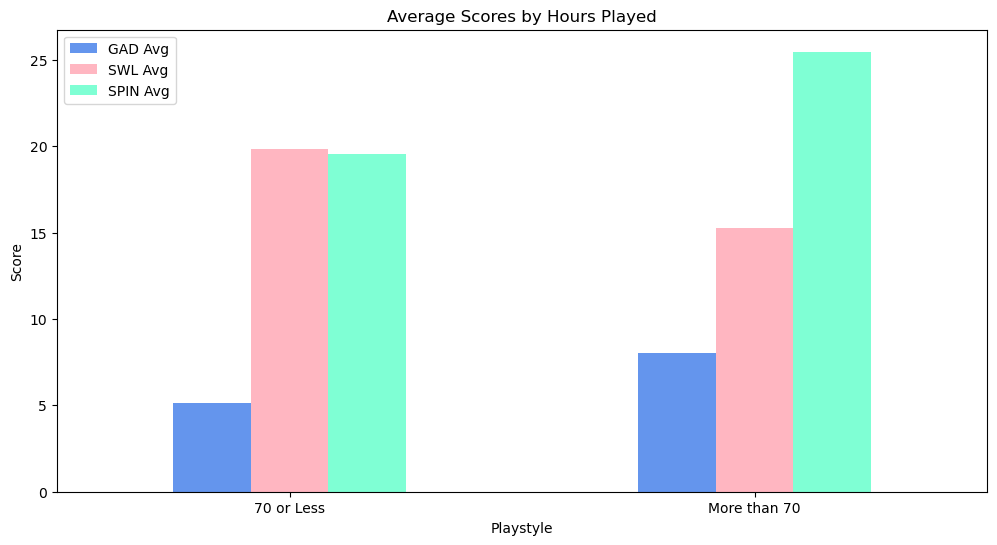

In [20]:
# create bar graph summarizing avg scores by hours played
cols_hours_avg = ['GAD Avg', 'SWL Avg', 'SPIN Avg']
color=['cornflowerblue', 'lightpink', 'aquamarine']

hours_halved_mean_df.plot(
    x = 'Hours per Week Range',
    y = ['GAD Avg', 'SWL Avg', 'SPIN Avg'], 
    kind = 'bar', 
    figsize = (12,6), 
    color = color,
    xlabel = 'Playstyle', 
    ylabel = 'Score', 
    title = 'Average Scores by Hours Played', 
    rot = 0
);

# save figure
plt.savefig('../images/hours_halved_bar_all')

# display figure
plt.show()

#### Additional Analysis: Separating hours played into more bins to better visualize trends in scores.

In [21]:
# create bins for hours played
bins = [1, 20, 40, 60, 80, 140]

# create names for bins
hour_ranges = ['1 to 20', '21 to 40', '41 to 60', '61 to 80', '80+']

# slice data and place into bins
hours_df['Hours per Week Range'] = pd.cut(hours_df['Hours per Week'], 
                                          bins, labels=hour_ranges, 
                                          include_lowest=True)

# display dataframe
hours_df.head()

,Entry,Hours per Week,GAD Total,SWL Total,SPIN Total,Hours per Week Range
0,1,15,1,23,5,1 to 20
1,2,8,8,16,33,1 to 20
3,4,20,0,17,11,1 to 20
4,5,20,14,14,13,1 to 20
5,6,4,1,17,13,1 to 20


In [22]:
# make new dataframe with averages of each score by hours played per week
cols_2 = ['Hours per Week Range', 'GAD Total', 'SWL Total', 'SPIN Total']
hours_mean_df = hours_df[cols_2].groupby(['Hours per Week Range'], observed=False).mean()
hours_mean_df = hours_mean_df.rename(columns={
    'GAD Total': 'GAD Avg',
    'SWL Total': 'SWL Avg',
    'SPIN Total': 'SPIN Avg'
}).reset_index()

# display dataframe
hours_mean_df.head()

,Hours per Week Range,GAD Avg,SWL Avg,SPIN Avg
0,1 to 20,4.920160,20.422726,18.695894
1,21 to 40,5.364785,19.164903,20.644033
2,41 to 60,6.413043,17.465580,22.952899
3,61 to 80,6.859504,16.429752,23.595041
4,80+,8.128205,15.666667,25.538462


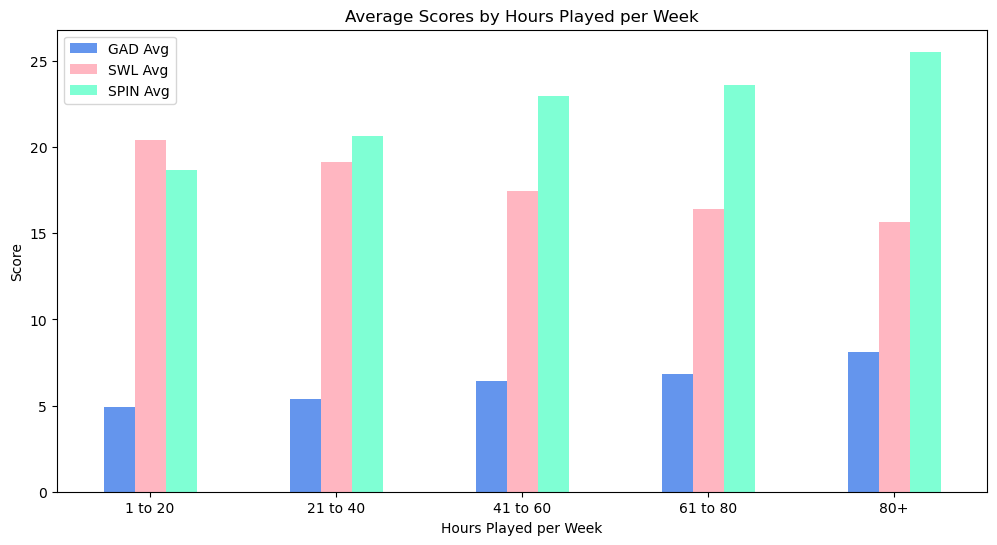

In [23]:
# create bar graph displaying avg scores by hours played per week
cols_2_avg = ['GAD Avg', 'SWL Avg', 'SPIN Avg']
color = ['cornflowerblue', 'lightpink', 'aquamarine']

hours_mean_df.plot(
    x = 'Hours per Week Range',
    y = ['GAD Avg', 'SWL Avg', 'SPIN Avg'], 
    kind ='bar', 
    figsize = (12,6), 
    color = color,
    xlabel = 'Hours Played per Week', 
    ylabel = 'Score', 
    title = 'Average Scores by Hours Played per Week', 
    rot = 0
);

# save figure
plt.savefig('../images/hours_binned_bar')

# display figure
plt.show()

---
### Question 2 Analysis:
##### Main observations:
##### Higher avg GAD score in >70 hours group
- t = -5.44, p= 5.44e-8
##### Lower avg SWL score in >70 hours group
- t= 5.65, p= 1.61e-8
##### Higher avg SPIN score in >70 hours group
- t= -3.90, p= 9.85e-5
##### Overall, we reject the null hypothesis and accept the alternate hypothesis: Hours played per week does have an effect on levels of anxiety, satisfaction with life, or social phobia for an individual who plays games.
- Exploratory commentary: Players who primarily play singleplayer games appear on average to be more negatively impacted by their mental health and are associated with higher levels of anxiety, lower levels of satisfaction with life, and higher levels of social phobia when compared to players who primarily play multiplayer games. A reasonable explanation for these observations could be that players with higher social phobia may gravitate towards singleplayer games in order to avoid social interaction that were to occur when playing multiplayer games. It is also possible for social phobia to serve as contributing factor to levels of anxiety, which may also additionally explain why anxiety levels are higher in players who play singleplayer than players who play multiplayer. In addition, due to increased levels of both anxiety and social phobia, this may also explain a decrease in satisfaction with life, as higher anxiety and social phobia can be seen as a source of discomfort that could possibly contribute to a lower SWL score.

---

### Combined exploratory commentary (playstyle + hours played)
- When taking a look at two aspects of gaming lifestyle, preferred playstyle and number of hours played, there appears to be a common denominator. Decisions being made about the type of playstyle an individual engages in or how many hours they want to play all contribute to the amount of socialization they are exposing themselves to. For example, a person who plays multiplayer games at a rate of only about 10 hours a week has the ability to interact with others in a digital setting, while also having a healthy amount of time to be away from playing videogames and spending time outside of their homes. On the other hand, a person who opts for only singleplayer games that plays over 10 hours a day (70 hours/week) has almost little to no time interacting or socializing with others, whether it be digitally/online or in real life. These gaming lifestyle choices, as a result, highly weigh into an individual’s overall lifestyle and ultimately into their mental health. It was observed overall that the more exposure and/or opportunities an individual who plays games has to socialize with others, the less their mental health (in this case anxiety, social phobia, and satisfaction with life) suffers. The less exposure and/or opportunities they have to socialize, the more they appear to be negatively impacted by their mental health. 